Author: Akshay Chougule

Creation Date: 05-Feb-2020

Description: This is a notebook for Human-Protein-Atlas-Competition

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib as plt
import matplotlib.pyplot as pyplt
import matplotlib.image as mpimg

In [3]:
import wget
import time
import os
import copy

In [4]:
data_root = "/home/ubuntu/datasets/human-protein-atlas/"

In [5]:
# Let's check how the directory structure looks like
!ls -l --block=M $data_root

total 17905M
-rw-rw-r-- 1 ubuntu ubuntu 17890M Feb  2 18:15 human-protein-atlas-image-classification.zip
-rw-r--r-- 1 ubuntu ubuntu     1M Dec 12 01:01 sample_submission.csv
drwxr-xr-x 2 ubuntu ubuntu     4M Feb  5 10:51 test
drwxr-xr-x 2 ubuntu ubuntu    10M Feb  5 10:53 train
-rw-r--r-- 1 ubuntu ubuntu     2M Dec 12 01:18 train.csv


In [6]:
os.chdir(data_root)

__Let's explore the training data__

In [7]:
!ls -l train/ | wc -l

124289


In [8]:
!ls -l train/ | head -10

total 13952180
-rw-r--r-- 1 ubuntu ubuntu  91603 Dec 12 01:18 00070df0-bbc3-11e8-b2bc-ac1f6b6435d0_blue.png
-rw-r--r-- 1 ubuntu ubuntu 144566 Dec 12 01:18 00070df0-bbc3-11e8-b2bc-ac1f6b6435d0_green.png
-rw-r--r-- 1 ubuntu ubuntu 176601 Dec 12 01:18 00070df0-bbc3-11e8-b2bc-ac1f6b6435d0_red.png
-rw-r--r-- 1 ubuntu ubuntu 143621 Dec 12 01:18 00070df0-bbc3-11e8-b2bc-ac1f6b6435d0_yellow.png
-rw-r--r-- 1 ubuntu ubuntu  33993 Dec 12 01:18 000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0_blue.png
-rw-r--r-- 1 ubuntu ubuntu  94588 Dec 12 01:18 000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0_green.png
-rw-r--r-- 1 ubuntu ubuntu 129766 Dec 12 01:18 000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0_red.png
-rw-r--r-- 1 ubuntu ubuntu 133728 Dec 12 01:18 000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0_yellow.png
-rw-r--r-- 1 ubuntu ubuntu  50838 Dec 12 01:18 000a9596-bbc4-11e8-b2bc-ac1f6b6435d0_blue.png
ls: write error: Broken pipe


In [9]:
!file train/000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0_yellow.png

train/000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0_yellow.png: PNG image data, 512 x 512, 8-bit grayscale, non-interlaced


In [10]:
!file train/00070df0-bbc3-11e8-b2bc-ac1f6b6435d0_blue.png

train/00070df0-bbc3-11e8-b2bc-ac1f6b6435d0_blue.png: PNG image data, 512 x 512, 8-bit grayscale, non-interlaced


__Let's look into the test data__

In [11]:
!ls -l test/ | wc -l

46809


In [12]:
!ls -l test/ | head -n 10

total 4665880
-rw-r--r-- 1 ubuntu ubuntu  55869 Dec 12 01:01 00008af0-bad0-11e8-b2b8-ac1f6b6435d0_blue.png
-rw-r--r-- 1 ubuntu ubuntu  95969 Dec 12 01:01 00008af0-bad0-11e8-b2b8-ac1f6b6435d0_green.png
-rw-r--r-- 1 ubuntu ubuntu 146895 Dec 12 01:01 00008af0-bad0-11e8-b2b8-ac1f6b6435d0_red.png
-rw-r--r-- 1 ubuntu ubuntu 161112 Dec 12 01:01 00008af0-bad0-11e8-b2b8-ac1f6b6435d0_yellow.png
-rw-r--r-- 1 ubuntu ubuntu  55523 Dec 12 01:01 0000a892-bacf-11e8-b2b8-ac1f6b6435d0_blue.png
-rw-r--r-- 1 ubuntu ubuntu  79492 Dec 12 01:01 0000a892-bacf-11e8-b2b8-ac1f6b6435d0_green.png
-rw-r--r-- 1 ubuntu ubuntu  90047 Dec 12 01:01 0000a892-bacf-11e8-b2b8-ac1f6b6435d0_red.png
-rw-r--r-- 1 ubuntu ubuntu  83968 Dec 12 01:01 0000a892-bacf-11e8-b2b8-ac1f6b6435d0_yellow.png
-rw-r--r-- 1 ubuntu ubuntu  48094 Dec 12 01:01 0006faa6-bac7-11e8-b2b7-ac1f6b6435d0_blue.png
ls: write error: Broken pipe


In [13]:
!file test/00008af0-bad0-11e8-b2b8-ac1f6b6435d0_blue.png

test/00008af0-bad0-11e8-b2b8-ac1f6b6435d0_blue.png: PNG image data, 512 x 512, 8-bit grayscale, non-interlaced


^ It seems we have 4 files per image. Each file is a png image containing 512\*512 pixels for one of the color channels.

__Training Label File__

In [14]:
train_lab = pd.read_csv('train.csv')

In [15]:
train_lab.shape

(31072, 2)

In [16]:
train_lab.head(7)

,Id,Target
0,00070df0-bbc3-11e8-b2bc-ac1f6b6435d0,16 0
1,000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0,7 1 2 0
2,000a9596-bbc4-11e8-b2bc-ac1f6b6435d0,5
3,000c99ba-bba4-11e8-b2b9-ac1f6b6435d0,1
4,001838f8-bbca-11e8-b2bc-ac1f6b6435d0,18
5,001bcdd2-bbb2-11e8-b2ba-ac1f6b6435d0,0
6,0020af02-bbba-11e8-b2ba-ac1f6b6435d0,25 2


^ We have multiple targets per image as seen above.

In [17]:
tt = train_lab['Target']

In [18]:
len(tt), type(tt)

(31072, pandas.core.series.Series)

In [19]:
tt2 = tt.str.cat(sep=' ').split(" ")

In [20]:
list(set(tt2))

['23',
 '27',
 '10',
 '25',
 '5',
 '6',
 '14',
 '9',
 '3',
 '2',
 '24',
 '4',
 '0',
 '15',
 '17',
 '7',
 '26',
 '13',
 '8',
 '11',
 '19',
 '22',
 '18',
 '21',
 '12',
 '20',
 '1',
 '16']

In [109]:
label_names = {
    '0':  "Nucleoplasm",  
    '1':  "Nuclear membrane",   
    '2':  "Nucleoli",   
    '3':  "Nucleoli fibrillar center",   
    '4':  "Nuclear speckles",
    '5':  "Nuclear bodies",   
    '6':  "Endoplasmic reticulum",   
    '7':  "Golgi apparatus",   
    '8':  "Peroxisomes",   
    '9':  "Endosomes",   
    '10':  "Lysosomes",   
    '11':  "Intermediate filaments",   
    '12':  "Actin filaments",   
    '13':  "Focal adhesion sites",   
    '14':  "Microtubules",   
    '15':  "Microtubule ends",   
    '16':  "Cytokinetic bridge",   
    '17':  "Mitotic spindle",   
    '18':  "Microtubule organizing center",   
    '19':  "Centrosome",   
    '20':  "Lipid droplets",   
    '21':  "Plasma membrane",   
    '22':  "Cell junctions",   
    '23':  "Mitochondria",   
    '24':  "Aggresome",   
    '25':  "Cytosol",   
    '26':  "Cytoplasmic bodies",   
    '27':  "Rods & rings"
}

In [110]:
from collections import Counter

In [122]:
class_counts = Counter(tt2)
df = pd.DataFrame.from_dict(class_counts, orient='index').sort_values(0)

In [142]:
# add a class_name column
df['class_label'] = df.index
# Replace number with class names using label_name dict
df['class_label'].replace(label_names, inplace=True)
#tt = df['class_label'].map(label_names)

In [144]:
df.head()

,0,class_label
27,11,Rods & rings
15,21,Microtubule ends
10,28,Lysosomes
9,45,Endosomes
8,53,Peroxisomes


In [132]:
import seaborn as sns

Text(0.5, 1.0, 'Class Distribution')

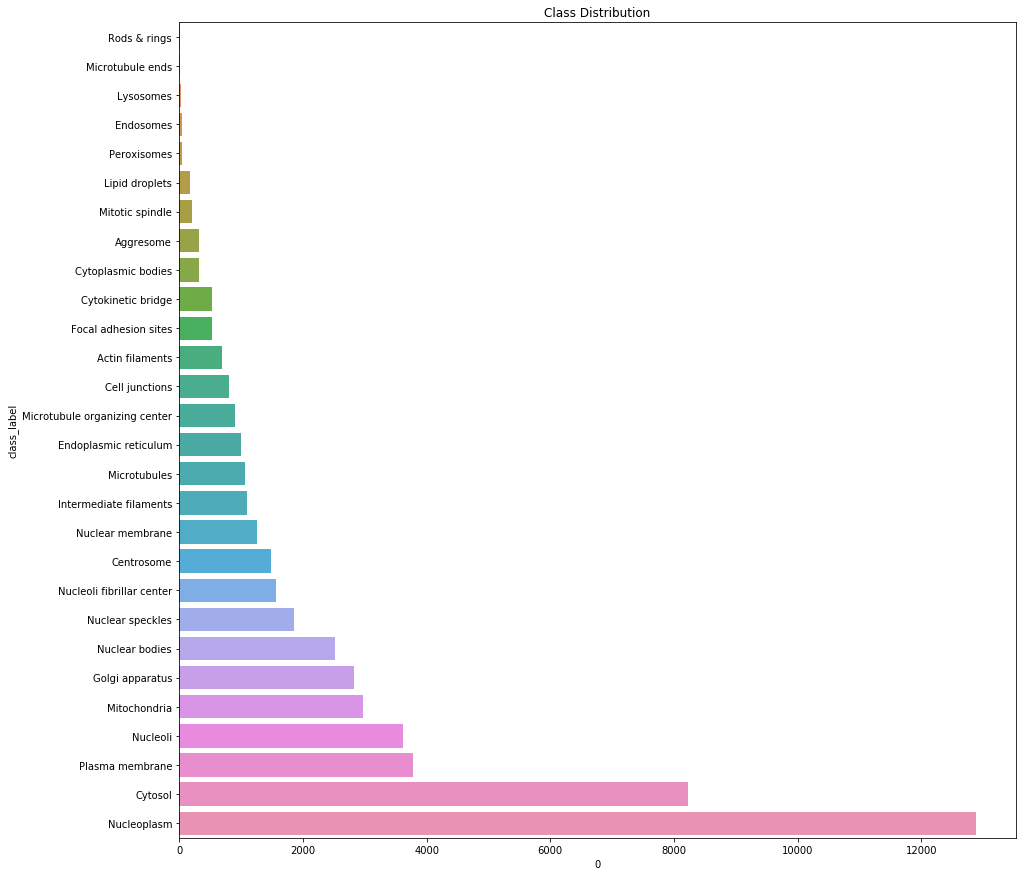

In [149]:
pyplt.figure(figsize=(15,15))
sns.barplot(x=df[0], y=df['class_label']).set_title("Class Distribution")

__Sample Submission File__

In [24]:
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission.shape

(11702, 2)

In [25]:
sample_submission.head(7)

,Id,Predicted
0,00008af0-bad0-11e8-b2b8-ac1f6b6435d0,0
1,0000a892-bacf-11e8-b2b8-ac1f6b6435d0,0
2,0006faa6-bac7-11e8-b2b7-ac1f6b6435d0,0
3,0008baca-bad7-11e8-b2b9-ac1f6b6435d0,0
4,000cce7e-bad4-11e8-b2b8-ac1f6b6435d0,0
5,00109f6a-bac8-11e8-b2b7-ac1f6b6435d0,0
6,001765de-bacd-11e8-b2b8-ac1f6b6435d0,0


In [26]:
# size of test dir data/4 
46808/4

11702.0

^ This matches with out sample_submission dimention

In [27]:
# size of train dir/4
124288/4

31072.0

So we have roughly 75% train data and 25% test data

### Creating Images

__part 1: Grayscale__

In [151]:
image = mpimg.imread(os.path.join(data_root,'train','00070df0-bbc3-11e8-b2bc-ac1f6b6435d0_blue.png'))

In [152]:
type(image), image.shape

(numpy.ndarray, (512, 512))

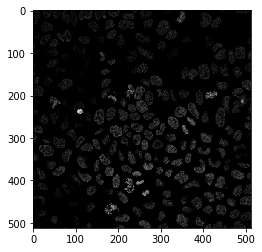

In [153]:
pyplt.imshow(image, cmap = pyplt.get_cmap('gray'))

__part 2: 4-channel image__

In [154]:
im_g = mpimg.imread(os.path.join(data_root,'train','00070df0-bbc3-11e8-b2bc-ac1f6b6435d0_green.png')).reshape(512,512,1)
im_y = mpimg.imread(os.path.join(data_root,'train','00070df0-bbc3-11e8-b2bc-ac1f6b6435d0_green.png')).reshape(512,512,1)
im_b = mpimg.imread(os.path.join(data_root,'train','00070df0-bbc3-11e8-b2bc-ac1f6b6435d0_blue.png')).reshape(512,512,1)
im_r = mpimg.imread(os.path.join(data_root,'train','00070df0-bbc3-11e8-b2bc-ac1f6b6435d0_red.png')).reshape(512,512,1)

In [155]:
im_g.shape

(512, 512, 1)

In [156]:
image = np.concatenate((im_g,im_y,im_b,im_r), axis=2)  #[im_g,im_y,im_b,im_r]
image.shape

(512, 512, 4)

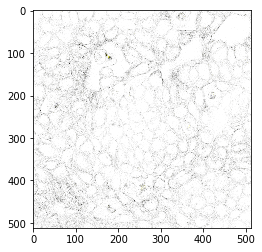

In [157]:
pyplt.imshow(image)

^ This is how an image looks after combining all 4 channels.

__part 3: converting 4 channels into 3__

source: https://www.quora.com/Why-does-red-and-green-make-yellow

In [184]:
# Now let's try merging the yellow channel info to other channels
image = np.concatenate((im_r+(im_y/2),im_g+(im_y/2),im_b), axis=2)
image.shape

(512, 512, 3)

In [185]:
# If we dom't do this then we get warning: Clipping input data to the valid range for imshow with RGB data 
rgb_image = image / image.max() * 255

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


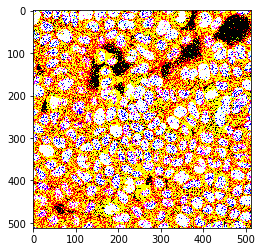

In [186]:
pyplt.imshow(rgb_image)

In [187]:
rgb_image.max()

255.0

In [194]:
image = np.concatenate((im_r+(im_y/3.33),im_g+(im_y/3.33),im_b+(im_y/3.33)), axis=2)
image.shape

(512, 512, 3)

In [198]:
# If we dom't do this then we get warning: Clipping input data to the valid range for imshow with RGB data 
rgb_image = image / image.max() * 255
image =rgb_image.astype(np.uint8)
image =image.astype(np.float64)

In [199]:
image.max(), image

(255.0, array([[[ 8.,  9.,  2.],
         [ 1.,  6.,  1.],
         [ 6., 27., 22.],
         ...,
         [ 0.,  1.,  7.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.]],
 
        [[ 4.,  3.,  4.],
         [ 4., 19., 10.],
         [ 4., 19., 11.],
         ...,
         [ 6.,  0.,  0.],
         [12.,  0.,  0.],
         [ 0.,  0.,  0.]],
 
        [[12., 51., 21.],
         [ 3., 15.,  8.],
         [ 8., 36., 19.],
         ...,
         [ 6., 17.,  3.],
         [ 0.,  0.,  0.],
         [10.,  0.,  0.]],
 
        ...,
 
        [[ 8.,  9.,  6.],
         [ 3.,  0.,  1.],
         [ 8.,  2.,  1.],
         ...,
         [23.,  4.,  0.],
         [13.,  0.,  0.],
         [ 0.,  2.,  0.]],
 
        [[10., 13.,  7.],
         [ 8.,  4.,  3.],
         [13.,  3.,  0.],
         ...,
         [ 6.,  0.,  0.],
         [ 6., 15.,  3.],
         [ 9.,  1.,  0.]],
 
        [[ 0.,  1.,  2.],
         [ 3., 16.,  6.],
         [ 1.,  1.,  1.],
         ...,
         [ 1.,  0.,  

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


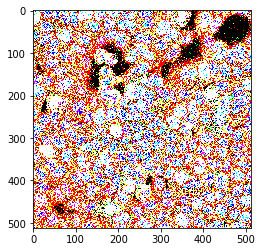

In [200]:
pyplt.imshow(image)

Any of the 2 options from part 3 looks good and should work fine.

### Saving Resize Images to disk

In [201]:
channels = ['_yellow', '_red', '_green', '_blue']

In [229]:
def create_rgb_image_from_four_channels(channels: list, size) -> np.ndarray:
    """
    It makes literally RGB image from source four channels, 
    where yellow image will be yellow color, red will be red and so on  
    """
    rgb_image = np.zeros(shape=(512, 512, 3), dtype=np.float)
    yellow = np.array(Image.open(channels[0]))
    # yellow is red + green
    rgb_image[:, :, 0] += yellow/2   
    rgb_image[:, :, 1] += yellow/2
    # loop for R,G and B channels
    for index, channel in enumerate(channels[1:]):
        current_image = Image.open(channel)
        rgb_image[:, :, index] += current_image
    # Normalize image
    rgb_image = rgb_image / rgb_image.max() * 255
    return rgb_image.astype(np.uint8)

In [232]:
def convert_and_resize_image( image_name, source_path, target_path, size=224 ):
    image_names = [os.path.join(source_path, image_name) + x + '.png' for x in channels]
    
    # create the 224 by 224 RGB image
    rgb_image = create_rgb_image_from_four_channels(image_names, size)    
    im = Image.fromarray(rgb_image)    
    
    # resize to the defined size
    im = im.resize((size, size)) 
    
    # save the resized RGB image
    image_name = image_name + '.png'
    new_image = os.path.join(target_path,image_name)
    im.save(new_image)     

In [218]:
first_10_images = sample_submission.iloc[:10,:1]

In [219]:
first_10_images

,Id
0,00008af0-bad0-11e8-b2b8-ac1f6b6435d0
1,0000a892-bacf-11e8-b2b8-ac1f6b6435d0
2,0006faa6-bac7-11e8-b2b7-ac1f6b6435d0
3,0008baca-bad7-11e8-b2b9-ac1f6b6435d0
4,000cce7e-bad4-11e8-b2b8-ac1f6b6435d0
5,00109f6a-bac8-11e8-b2b7-ac1f6b6435d0
6,001765de-bacd-11e8-b2b8-ac1f6b6435d0
7,0018641a-bac9-11e8-b2b8-ac1f6b6435d0
8,00200f22-bad7-11e8-b2b9-ac1f6b6435d0
9,0026f154-bac6-11e8-b2b7-ac1f6b6435d0


In [227]:
source_path = os.path.join(data_root,'test')
target_path = os.path.join(data_root,'test_224by224')

In [233]:
for img in first_10_images['Id']:
    print(img)
    convert_and_resize_image(img, source_path, target_path, size=224 )

00008af0-bad0-11e8-b2b8-ac1f6b6435d0
0000a892-bacf-11e8-b2b8-ac1f6b6435d0
0006faa6-bac7-11e8-b2b7-ac1f6b6435d0
0008baca-bad7-11e8-b2b9-ac1f6b6435d0
000cce7e-bad4-11e8-b2b8-ac1f6b6435d0
00109f6a-bac8-11e8-b2b7-ac1f6b6435d0
001765de-bacd-11e8-b2b8-ac1f6b6435d0
0018641a-bac9-11e8-b2b8-ac1f6b6435d0
00200f22-bad7-11e8-b2b9-ac1f6b6435d0
0026f154-bac6-11e8-b2b7-ac1f6b6435d0


In [235]:
!file $data_root/test_224by224/00008af0-bad0-11e8-b2b8-ac1f6b6435d0.png 

/home/ubuntu/datasets/human-protein-atlas//test_224by224/00008af0-bad0-11e8-b2b8-ac1f6b6435d0.png: PNG image data, 224 x 224, 8-bit/color RGB, non-interlaced


^ That looks good. We now have 224\*224 RGB images

Now let's do it for all images

In [241]:
# Getting the image ids
image_names = pd.Series(os.listdir(os.path.join(data_root,'train')))
len(image_names), image_names[:5]

(124288, 0       3d3be9de-bbc3-11e8-b2bc-ac1f6b6435d0_red.png
 1    285b6756-bb9b-11e8-b2b9-ac1f6b6435d0_yellow.png
 2     fef4fb24-bbb4-11e8-b2ba-ac1f6b6435d0_green.png
 3     e9ef9cb6-bbc3-11e8-b2bc-ac1f6b6435d0_green.png
 4      85677b00-bba6-11e8-b2ba-ac1f6b6435d0_blue.png
 dtype: object)

In [246]:
train_files = image_names.str.replace('_red.png|_yellow.png|_green.png|_blue.png','').unique()

In [248]:
len(train_files), train_files[:5]

(31072, array(['3d3be9de-bbc3-11e8-b2bc-ac1f6b6435d0',
        '285b6756-bb9b-11e8-b2b9-ac1f6b6435d0',
        'fef4fb24-bbb4-11e8-b2ba-ac1f6b6435d0',
        'e9ef9cb6-bbc3-11e8-b2bc-ac1f6b6435d0',
        '85677b00-bba6-11e8-b2ba-ac1f6b6435d0'], dtype=object))

^ Looks good

In [249]:
source_path = os.path.join(data_root,'train')
target_path = os.path.join(data_root,'train_224by224')

for img in train_files:
    convert_and_resize_image(img, source_path, target_path, size=224 )

In [250]:
# Let's check the file count
!ls -l train_224by224 | wc -l

31073


In [251]:
source_path = os.path.join(data_root,'test')
target_path = os.path.join(data_root,'test_224by224')

for img in sample_submission['Id']:
    convert_and_resize_image(img, source_path, target_path, size=224 )

In [252]:
# Let's check the file count
!ls -l test_224by224 | wc -l

11703


^ Counts for both train and test data files looks good.